# Demo of the segmentation of Seismic Images with Sel-Supervised Learning

This is a demo of the experiments performed for the paper "Semantic Segmentation of Seismic Images Based on Self-Supervised Learning from Few-Labeled Samples", submitted to the special stream of IEEE Geoscience and Remote Sensing letters at Sibgrapi 2022.

Authored by: 
  * Bruno A. A. Monteiro - Department of Computer Science, UFMG, Belo Horizonte, Brazil  
  * Hugo Oliveira  - Institute of Mathematics and Statistics, USP, São Paulo, Brazil
  * Jefersson A. dos Santos - Department of Computer Science, UFMG, Belo Horizonte, Brazil

In this Demo it is possible to visualize the already trained models for 1 and 5 shots, and also to fine-tune with 1 to 6 shots. 

So far, only a few samples of the open dataset Netherlands F3 Block are available. The full volume of data can be obtained at:

OpendTect project with 3D Seismic Data, Acoustic Impedance, Wells, Horizons - https://terranubis.com/datainfo/F3-Demo-2020

Interpreted geological data used in our paper: https://zenodo.org/record/1471548#.Ypj4vHXMKrx 


The interpreted volume of the Parihaka Dataset are open at: https://public.3.basecamp.com/p/JyT276MM7krjYrMoLqLQ6xST

First of all import the dataset and trained models

In [1]:
# Downloading the sample of F3_netherlands dataset
!wget https://www.dropbox.com/sh/sake8dobi53r4l3/AAAhjUFtsKACXEC1t6kA0JuZa -O F3_netherlands.zip
!unzip F3_netherlands.zip

--2022-06-06 13:20:09--  https://www.dropbox.com/sh/sake8dobi53r4l3/AAAhjUFtsKACXEC1t6kA0JuZa
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/sake8dobi53r4l3/AAAhjUFtsKACXEC1t6kA0JuZa [following]
--2022-06-06 13:20:10--  https://www.dropbox.com/sh/raw/sake8dobi53r4l3/AAAhjUFtsKACXEC1t6kA0JuZa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7c8b1640acebbb9190e464bc8c.dl.dropboxusercontent.com/zip_download_get/BKGhdw7CiMlLGBAR8rWZJPxSeqDmb4NVRmnEJ1HWXYgouKSPIyqzatOGSpVheCNjtzrt7lnTDoqePRYU1C5tCVlWmUjjtvBEvZNvjZTJyrT7dw# [following]
--2022-06-06 13:20:10--  https://uc7c8b1640acebbb9190e464bc8c.dl.dropboxusercontent.com/zip_download_get/BKGhdw7CiMlLGBAR8rWZJPxSeqDmb4NVRmnEJ1HWXYgouKSPIyqzatOGSpVheCNjtzrt7lnTDoqePRYU1C5tC

In [2]:
# Downloading the models trained for the F3_netherlands dataset
!wget https://www.dropbox.com/s/m2h4sgg01qh43w5/demo_models_ssl%20Bruno%20Monteiro.zip?dl=0 -O demo_models_ssl.zip
!unzip demo_models_ssl.zip

--2022-06-06 13:20:11--  https://www.dropbox.com/s/m2h4sgg01qh43w5/demo_models_ssl%20Bruno%20Monteiro.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/m2h4sgg01qh43w5/demo_models_ssl%20Bruno%20Monteiro.zip [following]
--2022-06-06 13:20:11--  https://www.dropbox.com/s/raw/m2h4sgg01qh43w5/demo_models_ssl%20Bruno%20Monteiro.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2bc3a793b02792574031898a1b.dl.dropboxusercontent.com/cd/0/inline/Bmuv7420eJOdW1gfdQ8fQAladhZJ8K7ByfXUaVQns8Q944Pw4X4PuIjS3U5zaBUP2CC-ZsdP7Igq9UeEEsMXBrcCoJuik8bTDQ03V6TB0cfTgnNnzfoQKsMjTfxNbpiCHnOFIxtnHNWXF5I5GHGQiQv0P7iVpdgSZDIvuITerbic7w/file# [following]
--2022-06-06 13:20:12--  https://uc2bc3a793b02792574031898a1b.dl.dropboxusercontent.c

The official codes are available at: https://github.com/brunoaugustoam/SSL_Seismic_Images

For this demo we firstly import the demo codes:

In [3]:
!git clone https://github.com/brunoaugustoam/SSL_Seismic_Images.git

Cloning into 'SSL_Seismic_Images'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (158/158), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 242 (delta 59), reused 120 (delta 47), pack-reused 84
Receiving objects: 100% (242/242), 7.75 MiB | 24.28 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [4]:
!pip install segyio 
!pip install torchinfo

#If finding trouble with version conflict, uncomment the code below and run it
#!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!mv /content/SSL_Seismic_Images/demo/* /content/

In [6]:
from aux_functions_demo import *
from plots_demo import *
from dataloader_seismic_demo import *
from fcn_demo import *
from train_segmentation_demo import *

from pathlib import Path
from torchinfo import summary
import os

In [7]:
root = '/content'

# Evaluate pre-trained model 

Define the dataset (for now only F3 Netherlands is available) and the other parameters

Here is also defining the pretext task, with must be set to jigsaw or rotation. This will later define the models to be imported, either for visualization, or for fine-tuning.

In [8]:
dataset = 'F3_netherlands'
pretask = 'jigsaw'

args = {
    'dataset'   : dataset,  #Available: 'F3_netherlands'
    'pretask' : pretask,      #Available:jigsaw  //  rotation
    'task'      : 'segmentation',
    'batch_size' : 1,
    'num_workers' : 2,
    'n_channels' : 1,
    'n_classes' : 10,
    'height' : 448,
    'width' : 448,
    'train_type' : 'fine_tune'  
}
    
if args['pretask'] == 'jigsaw':
    args['pre_classes'] =  9
elif args['pretask'] == 'rotation':
    args['pre_classes'] =  5

#Check GPU availability
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')
print(args['device'])



cuda


Here sets the number of shots. In the dataset folder, only 10 sections are available, and therefore, one could use up to 6 shots for fine-tuning. If just visualizing, models for 1 and 5-shots are trained and made available.

In [9]:
n_few_shot = 1 #Available: 1 // 5

#For testing the fine-tuned model or only evaluating the loaded one, the test_set is used
test_set = SeismicDataset(root=root, dataset_name=dataset, split='test', 
                            task=args['task'],train_type=args['train_type'],n_few_shot=n_few_shot)

dataloader_test = DataLoader(test_set, 
                              batch_size=args['batch_size'],
                              shuffle=False,num_workers=args['num_workers']) 

In [10]:
test_set.sec_number_list

['inline_608', 'crossline_778', 'crossline_652', 'inline_130']

In [11]:
#If you just want to evaluate the already trained model, the following model can be used
finetuned_model = f'{dataset}_{pretask}_{n_few_shot}shot'
finetuned_model

'F3_netherlands_jigsaw_1shot'

### Load fine-tuned model

In [12]:
# loss definition
criterion = set_criterion(args['task'],args['device'])  #For Jigsaw, Rotation and Segmentation, will be set to CrossEntropyLoss


# Instantiating architecture - first with the pretext task
model = FCN(num_classes=args['pre_classes'], in_channels=args['n_channels'],task=pretask).to(args['device'])

#Update the task for segmentation (used downstream task)
model.update_task(args['task'], args['n_classes'])

#After defining the correct model, upload the weights
model = model.to(args['device']) #must be on GPU, as the trained models are cast to GPU
model.load_state_dict(torch.load(finetuned_model))

<All keys matched successfully>

In [13]:
summary(model,input_size=(args['batch_size'],args['n_channels'],args['width'],args['height'] ))

Layer (type:depth-idx)                   Output Shape              Param #
FCN                                      [1, 10, 448, 448]         12,372,233
├─Conv2d: 1-1                            [1, 64, 224, 224]         3,136
├─BatchNorm2d: 1-2                       [1, 64, 224, 224]         128
├─ReLU: 1-3                              [1, 64, 224, 224]         --
├─Dropout2d: 1-4                         [1, 64, 224, 224]         --
├─MaxPool2d: 1-5                         [1, 64, 112, 112]         --
├─Sequential: 1-6                        [1, 256, 112, 112]        --
│    └─Bottleneck: 2-1                   [1, 256, 112, 112]        --
│    │    └─Conv2d: 3-1                  [1, 64, 112, 112]         4,096
│    │    └─BatchNorm2d: 3-2             [1, 64, 112, 112]         128
│    │    └─ReLU: 3-3                    [1, 64, 112, 112]         --
│    │    └─Conv2d: 3-4                  [1, 64, 112, 112]         36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 112, 112]       

### Evaluation

0/4.0


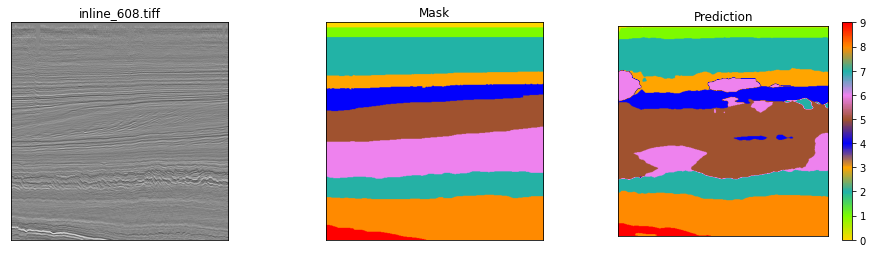

test loss 0.78002,  test mean iou: 0.632


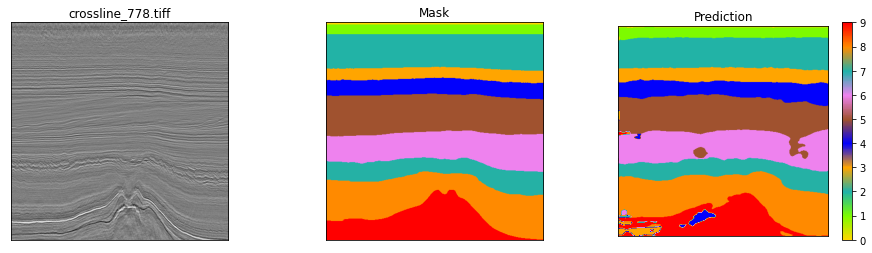

test loss 0.49243,  test mean iou: 0.8368


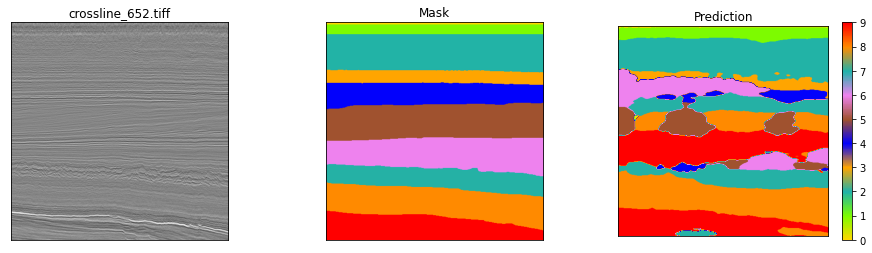

test loss 0.77871,  test mean iou: 0.4923


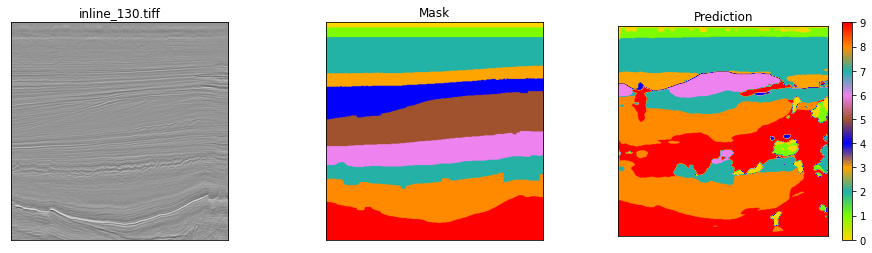

test loss 1.19668,  test mean iou: 0.3151

test loss 1.19668,  test mean iou general: 0.3151


In [14]:
iou_classes,iou_classes_std,iou_mean,loss,loss_std,test_pred,label_list=test_segmentation(dataloader_test, 
                                                                              model, 
                                                                              criterion, 
                                                                              args['device'],
                                                                              args['n_classes'],
                                                                              plot_all=True)


# Fine-Tune a model trained only on the give pretext task

In [15]:
dataset = 'F3_netherlands'
pretask = 'jigsaw'

args = {
    'dataset'   : dataset,  #Available: 'F3_netherlands'
    'pretask' : pretask,      #Available:jigsaw  //  rotation
    'task'      : 'segmentation',
    'batch_size' : 1,
    'num_workers' : 2,
    'n_channels' : 1,
    'n_classes' : 10,
    'height' : 448,
    'width' : 448,
    'train_type' : 'fine_tune',
    'lr_backbone': 0.0001,
    'lr_seg' : 0.001,
    'step_size' : 20,
    'gamma'   :  0.5,
    'weight_decay': 1e-4,

    'epochs'    : 100, 

}
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')
print(args['device'])

if args['pretask'] == 'jigsaw':
    args['pre_classes'] =  9
elif args['pretask'] == 'rotation':
    args['pre_classes'] =  5



cuda


In [16]:
n_few_shot = 1 #Available: 1 to 6
#if fine tuning, only train_set is used, a later testing is necessary
train_set = SeismicDataset(root=root, dataset_name=args['dataset'], split='train', task=args['task'],
                          train_type=args['train_type'],n_few_shot=n_few_shot)
dataloader_train = DataLoader(train_set, 
                              batch_size=args['batch_size'],
                              shuffle=True,num_workers=args['num_workers']) 

train_set.sec_number_list

['inline_459']

In [17]:
#If Finetuning the model trained with the pretext task, this model can be used
model_to_finetune = f'{dataset}_{pretask}'
model_to_finetune

'F3_netherlands_jigsaw'

### Load model trained on the pretext task

In [18]:
# Instantiating architecture - first with the pretext task
model = FCN(num_classes=args['pre_classes'], in_channels=args['n_channels'],task=pretask).to(args['device'])

#Cast to GPU
model = model.to(args['device']) #must be on GPU, as the trained models are cast to GPU

#After defining the correct model, upload the weights - weights from the pretext task
model.load_state_dict(torch.load(model_to_finetune))

#Update the task for segmentation - note that now the weight are from the pretext, not from the network trained for segmentation
model.update_task(args['task'], args['n_classes'])
model = model.to(args['device']) #must be on GPU, as the trained models are cast to GPU



In [19]:
# loss definition
criterion = set_criterion(args['task'],args['device'])  #For Jigsaw, Rotation and Segmentation, will be set to CrossEntropyLoss

optimizer = torch.optim.Adam([
    {'params': model.layer1.parameters(), 'lr':args['lr_backbone']}, 
    {'params': model.layer2.parameters(), 'lr':args['lr_backbone'] },
    {'params': model.layer3.parameters(), 'lr':args['lr_backbone'] },
    {'params': model.layer4.parameters(), 'lr':args['lr_backbone'] },

    {'params':model.segmenter.parameters(), 'lr':args['lr_seg'] }, ],
    lr=args['lr_seg'], weight_decay= args['weight_decay'])

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=args['step_size'], gamma=args['gamma'])

### Train

In [20]:
train_iou_classes_all,train_iou_std_between_classes_all,train_iou_mean_all,train_loss_mean_all,train_loss_std_all= train_segmentation(
        dataloader_train=dataloader_train,
        model=model,
        optimizer=optimizer,
        criterion=criterion,
        num_epochs=args['epochs'],
        device=args['device'],
        num_classes=args['n_classes'],
        scheduler=scheduler,
        task=args['task'],
        train_type=args['train_type'], 
        weighted=True)

training on cuda
Training epoch 1 / 100
0/1.0
epoch 1/100, train loss 2.357, mean iou over all classes: 0.0246 ,time 2.3 sec, n=1
highest_iou: 0 -> 0.02462465228382359

Training epoch 2 / 100
0/1.0
epoch 2/100, train loss 1.543, mean iou over all classes: 0.2717 ,time 4.6 sec, n=1
highest_iou: 0.02462465228382359 -> 0.27166445429457275

Training epoch 3 / 100
0/1.0
epoch 3/100, train loss 1.412, mean iou over all classes: 0.4192 ,time 6.8 sec, n=1
highest_iou: 0.27166445429457275 -> 0.41922395178248895

Training epoch 4 / 100
0/1.0
epoch 4/100, train loss 1.134, mean iou over all classes: 0.4365 ,time 9.1 sec, n=1
highest_iou: 0.41922395178248895 -> 0.43646946163026845

Training epoch 5 / 100
0/1.0
epoch 5/100, train loss 0.9769, mean iou over all classes: 0.5133 ,time 11.3 sec, n=1
highest_iou: 0.43646946163026845 -> 0.5133208567343603

Training epoch 6 / 100
0/1.0
epoch 6/100, train loss 0.9262, mean iou over all classes: 0.5449 ,time 13.6 sec, n=1
highest_iou: 0.5133208567343603 -> 

### Evaluation

In [21]:
test_set = SeismicDataset(root=root, dataset_name=dataset, split='test', 
                            task=args['task'],train_type=args['train_type'],n_few_shot=n_few_shot)

dataloader_test = DataLoader(test_set, 
                              batch_size=args['batch_size'],
                              shuffle=False,num_workers=args['num_workers']) 

0/4.0


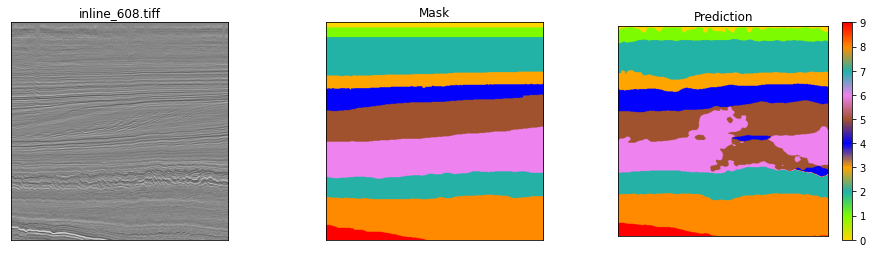

test loss 0.27811,  test mean iou: 0.7607


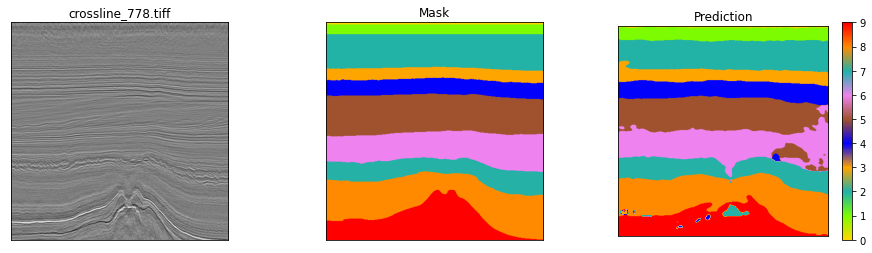

test loss 0.28238,  test mean iou: 0.7945


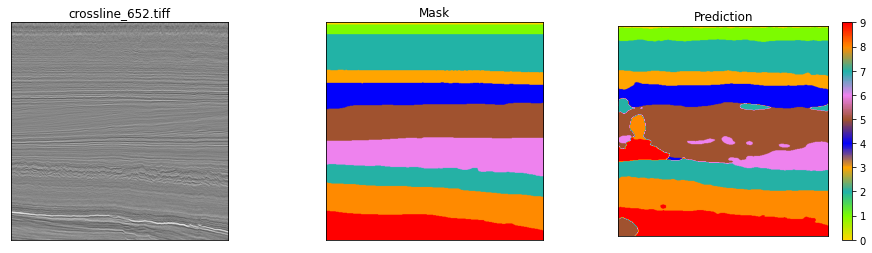

test loss 0.31960,  test mean iou: 0.738


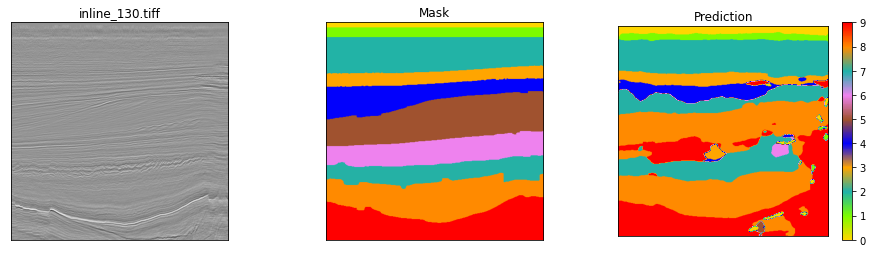

test loss 0.70043,  test mean iou: 0.4235

test loss 0.70043,  test mean iou general: 0.4235


In [22]:
iou_classes,iou_classes_std,iou_mean,loss,loss_std,test_pred,label_list=test_segmentation(dataloader_test, 
                                                                              model, 
                                                                              criterion, 
                                                                              args['device'],
                                                                              args['n_classes'],
                                                                              plot_all=True)


# Baseline - Train new model from scratch

In [23]:
dataset = 'F3_netherlands'

args = {
    'dataset'   : dataset,  #Available: 'F3_netherlands'
    'task'      : 'segmentation',
    'batch_size' : 1,
    'num_workers' : 2,
    'n_channels' : 1,
    'n_classes' : 10,
    'height' : 448,
    'width' : 448,
    'train_type' : 'fine_tune',
    'lr_backbone': 0.001,
    'lr_seg' : 0.01,
    'step_size' : 20,
    'gamma'   :  0.5,
    'weight_decay': 1e-4,

    'epochs'    : 100, 

}
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')
print(args['device'])


cuda


In [24]:
n_few_shot = 1 #Available: 1 to 6
#if fine tuning, only train_set is used, a later testing is necessary
train_set = SeismicDataset(root=root, dataset_name=args['dataset'], split='train', task=args['task'],
                          train_type=args['train_type'],n_few_shot=n_few_shot)
dataloader_train = DataLoader(train_set, 
                              batch_size=args['batch_size'],
                              shuffle=True,num_workers=args['num_workers']) 

train_set.sec_number_list

['inline_459']

In [25]:
# Instantiating architecture - first with the pretext task
model = FCN(num_classes=args['n_classes'], in_channels=args['n_channels'],task=args['task']).to(args['device'])

model = model.to(args['device']) #must be on GPU, as the trained models are cast to GPU



In [26]:
# loss definition
criterion = set_criterion(args['task'],args['device'])  #For Jigsaw, Rotation and Segmentation, will be set to CrossEntropyLoss

optimizer = torch.optim.Adam([
    {'params': model.layer1.parameters(), 'lr':args['lr_backbone']}, 
    {'params': model.layer2.parameters(), 'lr':args['lr_backbone'] },
    {'params': model.layer3.parameters(), 'lr':args['lr_backbone'] },
    {'params': model.layer4.parameters(), 'lr':args['lr_backbone'] },

    {'params':model.segmenter.parameters(), 'lr':args['lr_seg'] }, ],
    lr=args['lr_seg'], weight_decay= args['weight_decay'])

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=args['step_size'], gamma=args['gamma'])

### Train

In [27]:
train_iou_classes_all,train_iou_std_between_classes_all,train_iou_mean_all,train_loss_mean_all,train_loss_std_all= train_segmentation(
        dataloader_train=dataloader_train,
        model=model,
        optimizer=optimizer,
        criterion=criterion,
        num_epochs=args['epochs'],
        device=args['device'],
        num_classes=args['n_classes'],
        scheduler=scheduler,
        task=args['task'],
        train_type=args['train_type'], 
        weighted=True)

training on cuda
Training epoch 1 / 100
0/1.0
epoch 1/100, train loss 7.212, mean iou over all classes: 0.0364 ,time 2.3 sec, n=1
highest_iou: 0 -> 0.03641317056503164

Training epoch 2 / 100
0/1.0
epoch 2/100, train loss 4.926, mean iou over all classes: 0.1877 ,time 4.8 sec, n=1
highest_iou: 0.03641317056503164 -> 0.18767881690018554

Training epoch 3 / 100
0/1.0
epoch 3/100, train loss 4.69, mean iou over all classes: 0.2795 ,time 7.1 sec, n=1
highest_iou: 0.18767881690018554 -> 0.279461353423545

Training epoch 4 / 100
0/1.0
epoch 4/100, train loss 2.159, mean iou over all classes: 0.3024 ,time 9.5 sec, n=1
highest_iou: 0.279461353423545 -> 0.30236636631359975

Training epoch 5 / 100
0/1.0
epoch 5/100, train loss 2.541, mean iou over all classes: 0.2799 ,time 11.9 sec, n=1
counter at 1/40

Training epoch 6 / 100
0/1.0
epoch 6/100, train loss 1.77, mean iou over all classes: 0.3566 ,time 14.3 sec, n=1
highest_iou: 0.30236636631359975 -> 0.35655644321047264

Training epoch 7 / 100
0/

### Evaluation

In [28]:
test_set = SeismicDataset(root=root, dataset_name=dataset, split='test', 
                            task=args['task'],train_type=args['train_type'],n_few_shot=n_few_shot)

dataloader_test = DataLoader(test_set, 
                              batch_size=args['batch_size'],
                              shuffle=False,num_workers=args['num_workers']) 

0/4.0


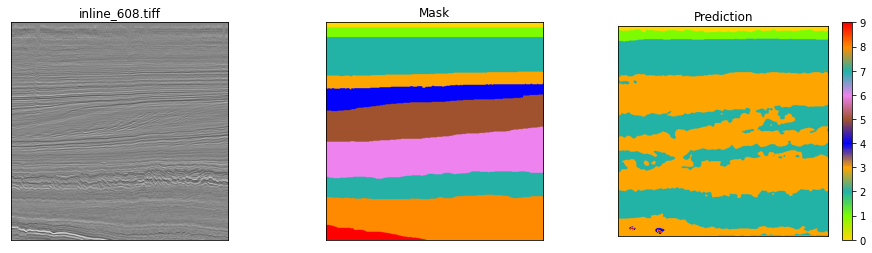

test loss 6.02671,  test mean iou: 0.2233


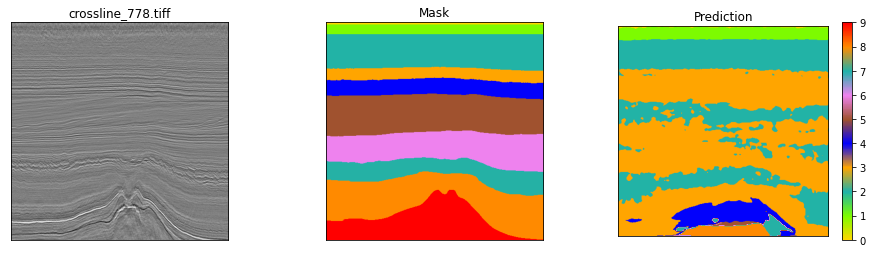

test loss 6.00463,  test mean iou: 0.2072


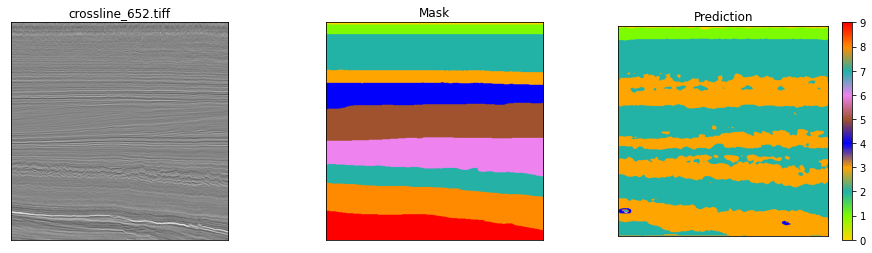

test loss 6.29109,  test mean iou: 0.1964


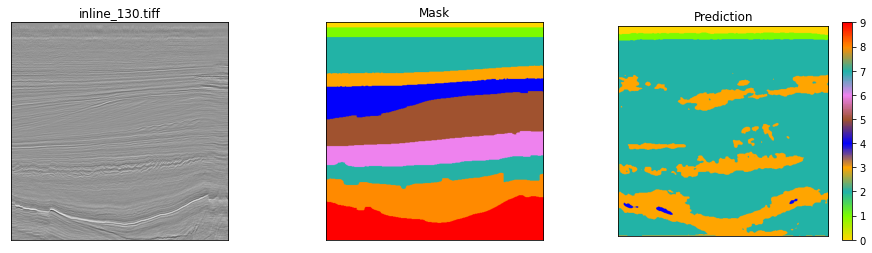

test loss 6.47088,  test mean iou: 0.1517

test loss 6.47088,  test mean iou general: 0.1517


In [29]:
iou_classes,iou_classes_std,iou_mean,loss,loss_std,test_pred,label_list=test_segmentation(dataloader_test, 
                                                                              model, 
                                                                              criterion, 
                                                                              args['device'],
                                                                              args['n_classes'],
                                                                              plot_all=True)
